In [51]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
import pandas as pd
import numpy as np
import numpy
import cv2
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SequentialFeatureSelector

In [3]:
#資料路徑
folder = '/Users/nuo/Documents/DA/HW2/ORL Faces'

#判斷性別
def gender(g):
    if g in [1, 8, 10, 32]:
        return 0
    else:
        return 1
    
#讀檔、建立矩陣
def order():
    pic = []
    gender_list = []
    #按照順序讀取圖片
    for i in range(1, 41):
        for j in range(1, 11):
            img = cv2.imread(folder + '/' + str(i) + '_' + str(j) + '.png', 0)
            pic.append(img)
            gender_list.append(gender(i))      
    #將性別資料加入原先矩陣中     
    arr = np.array(pic)
    arr = arr.reshape(400, 2576)
    arr = pd.DataFrame(arr)
    arr['gender'] = [g for g in gender_list]   
    return arr

#輸出結果
result = order()

In [4]:
result

,0,1,2,3,4,5,6,7,8,9,...,2567,2568,2569,2570,2571,2572,2573,2574,2575,gender
0,88,88,90,91,91,92,90,93,99,109,...,176,166,149,142,145,141,138,142,134,0
1,87,90,95,96,92,90,97,107,111,112,...,175,172,147,131,132,124,124,120,88,0
2,92,92,88,98,104,109,108,100,80,63,...,84,128,154,161,169,170,165,146,151,0
3,92,96,93,94,99,105,108,109,121,152,...,153,164,163,165,166,161,157,79,54,0
4,83,75,88,91,101,90,86,80,63,58,...,145,148,151,139,134,173,167,176,188,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,124,124,125,123,124,125,123,124,123,122,...,34,63,37,37,37,38,39,38,40,1
396,128,128,128,128,129,128,129,127,127,127,...,92,90,90,91,91,91,91,92,93,1
397,122,123,124,124,123,123,122,126,130,126,...,24,57,41,37,36,37,38,40,38,1
398,120,119,121,119,120,121,122,117,111,100,...,137,134,101,26,77,95,95,92,90,1


In [5]:
data = result.drop(columns = 'gender')
data

,0,1,2,3,4,5,6,7,8,9,...,2566,2567,2568,2569,2570,2571,2572,2573,2574,2575
0,88,88,90,91,91,92,90,93,99,109,...,168,176,166,149,142,145,141,138,142,134
1,87,90,95,96,92,90,97,107,111,112,...,167,175,172,147,131,132,124,124,120,88
2,92,92,88,98,104,109,108,100,80,63,...,111,84,128,154,161,169,170,165,146,151
3,92,96,93,94,99,105,108,109,121,152,...,154,153,164,163,165,166,161,157,79,54
4,83,75,88,91,101,90,86,80,63,58,...,141,145,148,151,139,134,173,167,176,188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,124,124,125,123,124,125,123,124,123,122,...,57,34,63,37,37,37,38,39,38,40
396,128,128,128,128,129,128,129,127,127,127,...,96,92,90,90,91,91,91,91,92,93
397,122,123,124,124,123,123,122,126,130,126,...,68,24,57,41,37,36,37,38,40,38
398,120,119,121,119,120,121,122,117,111,100,...,146,137,134,101,26,77,95,95,92,90


In [6]:
#標準化
# scaler = StandardScaler()
# data = scaler.fit_transform(data)
# data = pd.DataFrame(data)
# data

In [7]:
y = result['gender']
x = data
#x, y = np.array(data), np.array(y)

In [8]:
#LinearRegression Model
model = LinearRegression().fit(x, y)

In [9]:
# #Sequential Feature Selector
# #定義SFS，最終希望變成50個feature，direction沒設代表default forward
# sfs = SequentialFeatureSelector(model, n_features_to_select=50)
# #學習feature selection
# sfs.fit(x, y)

In [10]:
#
val = []
for i in range(len(model.coef_)):
    if abs(model.coef_[i]) > 0.0002:
        val.append(i)
f = data[val]
f

,41,44,45,56,89,154,156,183,201,202,...,2310,2419,2438,2470,2485,2528,2539,2540,2546,2574
0,87,85,86,175,87,88,105,90,60,67,...,113,103,78,112,114,102,135,124,82,142
1,128,138,133,144,136,127,98,130,102,98,...,146,112,198,91,211,80,111,101,90,120
2,140,149,142,65,145,79,66,134,71,60,...,94,76,75,107,78,150,206,195,86,146
3,123,93,86,165,115,98,86,106,94,87,...,99,95,200,157,205,55,130,124,79,79
4,139,151,162,58,152,71,79,133,75,88,...,52,80,50,133,52,166,125,155,57,176
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,119,118,119,130,120,92,87,118,92,81,...,133,174,91,78,91,37,102,137,64,38
396,124,124,123,138,124,73,73,124,87,85,...,159,123,71,131,70,91,105,94,55,92
397,121,121,119,125,121,100,91,119,102,96,...,119,177,88,97,88,40,121,130,81,40
398,126,126,126,77,126,169,139,124,109,110,...,63,84,63,141,62,92,63,28,48,92


In [11]:
#stepwise 1
StatsModel = sm.OLS(y, f).fit()
print(StatsModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 gender   R-squared (uncentered):                   0.982
Model:                            OLS   Adj. R-squared (uncentered):              0.975
Method:                 Least Squares   F-statistic:                              141.1
Date:                Sun, 12 Mar 2023   Prob (F-statistic):                   2.54e-203
Time:                        21:48:55   Log-Likelihood:                          255.67
No. Observations:                 400   AIC:                                     -289.3
Df Residuals:                     289   BIC:                                      153.7
Df Model:                         111                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
s = StatsModel.pvalues
s = pd.DataFrame(s)
s['pvalue'] = s[0]
s = s.reset_index()
s = s.drop(0, axis='columns')

In [13]:
f1 = []
for i in range(len(s)):
    if s['pvalue'][i] < 0.05:
        f1.append(s['index'][i])
print(f1)

[56, 969, 976, 1046, 1062, 1069, 1167, 1177, 1323, 1367, 1417, 1427, 1446, 1681, 1730, 1789, 1835, 1845, 1891, 1902, 1934, 2030, 2073, 2116, 2274, 2419, 2438, 2470, 2485, 2540, 2546]


In [14]:
f = f[f1]

In [15]:
#stepwise 2
StatsModel = sm.OLS(y, f).fit()
print(StatsModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.958
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              273.6
Date:                Sat, 11 Mar 2023   Prob (F-statistic):                   5.41e-234
Time:                        22:21:50   Log-Likelihood:                          88.959
No. Observations:                 400   AIC:                                     -115.9
Df Residuals:                     369   BIC:                                      7.817
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [16]:
s = StatsModel.pvalues
s = pd.DataFrame(s)
s['pvalue'] = s[0]
s = s.reset_index()
s = s.drop(0, axis='columns')

In [17]:
f2 = []
for i in range(len(s)):
    if s['pvalue'][i] < 0.05:
        f2.append(s['index'][i])
print(f2)
f = f[f2]

[56, 969, 976, 1062, 1167, 1177, 1323, 1367, 1417, 1427, 1446, 1681, 1730, 1891, 1902, 1934, 2030, 2073, 2116, 2274, 2419, 2438, 2485, 2540, 2546]


In [18]:
#stepwise 3
StatsModel = sm.OLS(y, f).fit()
print(StatsModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              337.8
Date:                Sat, 11 Mar 2023   Prob (F-statistic):                   6.32e-240
Time:                        22:21:53   Log-Likelihood:                          85.080
No. Observations:                 400   AIC:                                     -120.2
Df Residuals:                     375   BIC:                                     -20.37
Df Model:                          25                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [19]:
s = StatsModel.pvalues
s = pd.DataFrame(s)
s['pvalue'] = s[0]
s = s.reset_index()
s = s.drop(0, axis='columns')

In [20]:
f3 = []
for i in range(len(s)):
    if s['pvalue'][i] < 0.05:
        f3.append(s['index'][i])
print(f3)
f = f[f3]

[56, 969, 1062, 1167, 1177, 1323, 1367, 1417, 1427, 1446, 1681, 1730, 1902, 1934, 2030, 2073, 2116, 2274, 2419, 2438, 2485, 2540, 2546]


In [21]:
#stepwise 4
StatsModel = sm.OLS(y, f).fit()
print(StatsModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.957
Model:                            OLS   Adj. R-squared (uncentered):              0.954
Method:                 Least Squares   F-statistic:                              362.3
Date:                Sat, 11 Mar 2023   Prob (F-statistic):                   5.07e-241
Time:                        22:21:57   Log-Likelihood:                          81.475
No. Observations:                 400   AIC:                                     -117.0
Df Residuals:                     377   BIC:                                     -25.15
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

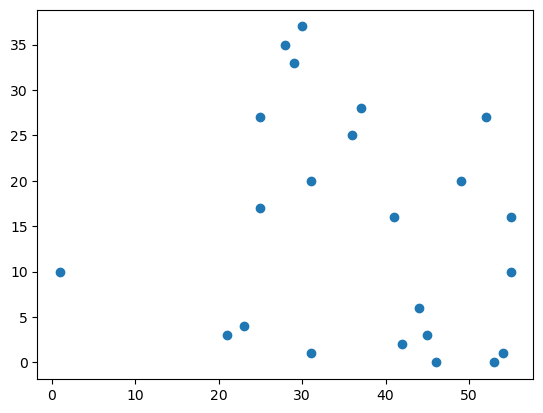

In [39]:
features = f3
xlabel = []
ylabel = []
for i in features:
    xlabel.append(i // 46)
    ylabel.append(i % 46)
plt.scatter(xlabel, ylabel)
plt.show()

In [44]:
row = []
for i in range(61, 0, -1):
    row.append(i)

df = pd.read_csv('Volcano.csv', header = None, names = range(1, 88))
df.set_axis(row, axis='rows', inplace=True)
df

,1,2,3,4,5,6,7,8,9,10,...,78,79,80,81,82,83,84,85,86,87
61,100,101,102,103,104,105,105,106,107,108,...,100,100,99,99,99,99,98,98,97,97
60,100,101,102,103,104,105,106,107,108,109,...,101,101,100,100,100,99,99,98,98,97
59,101,102,103,104,105,105,106,107,108,109,...,102,101,101,100,100,99,99,98,98,97
58,101,102,103,104,105,106,107,108,109,110,...,102,102,102,101,100,99,99,99,98,98
57,101,102,103,104,105,106,107,108,109,110,...,103,102,102,101,101,100,99,99,99,98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,105,106,106,107,107,108,108,109,109,110,...,96,96,96,95,95,94,94,94,94,94
4,105,105,106,106,107,107,108,108,109,109,...,96,96,96,95,95,94,94,94,94,94
3,104,105,105,106,106,107,107,108,108,108,...,96,96,96,95,95,94,94,94,94,94
2,104,104,105,105,106,106,107,107,107,107,...,96,96,95,95,95,94,94,94,94,94


In [46]:
def threebythree(point):
    list = []
    for x2 in range(max(point[1]-1, 1), min(point[1]+2, 62)):
        for x1 in range(max(point[0]-1,1), min(point[0]+2,88)):
            list.append([x1, x2, df.loc[x2][x1]])
    return pd.DataFrame(list)
threebythree([87, 1])

def twobytwo(point):
    list = []
    for x2 in range(max(point[1], 1), min(point[1]+2, 62)):
        for x1 in range(max(point[0]-1, 1), min(point[0]+1, 88)):
            list.append([x1, df.loc[x2][x1]])
    return pd.DataFrame(list)
twobytwo([87, 1])

,0,1
0,86,94
1,87,94
2,86,94
3,87,94


In [70]:
import math

point = [87, 1]
iteration = 1
highest = 0
highest_point = []

while iteration <= 5000:
    print("---------------------ITERATION : " , iteration , " --------------------------")
    # using 3x3 at most as domain to build regression model
    small_domain = threebythree(point)
    features = small_domain.iloc[:, :2]
    label = small_domain.iloc[:, 2:]
    model = LinearRegression()
    model = model.fit(features, label)
    print('model intercept :', model.intercept_) # Beta0
    print('model coefficients : ', model.coef_) # Beta1 ~ Beta2
    print('Model score : ', model.score(features, label)) # R squared
    
    if model.score(features, label) < 0.5:
         # using 2x2 at most as domain to build regression model
        print("REBULD MODEL!!!!")
        smaller_domain = twobytwo(point)
        features = smaller_domain.iloc[:, :2]
        label = smaller_domain.iloc[:, 2:]
        model = LinearRegression()
        model = model.fit(features, label)
        print('model intercept :', model.intercept_) # Beta0
        print('model coefficients : ', model.coef_) # Beta1 ~ Beta2
        print('Model score : ', model.score(features, label)) # R squared
        
    # compute gradient of x1, x2 to decide next iteration's direction
    g_x1 = model.coef_[0][0]
    g_x2 = model.coef_[0][1]
    
    stepx1 = math.floor(abs(g_x1))
    stepx2 = math.floor(abs(g_x2))
    
    # 判斷beta1, beta2正負
    signx1 = 0
    signx2 = 0
    if g_x1 < 0:
        signx1 = -1
    elif g_x1 > 0:
        signx1 = 1
    else:
        signx1 = 0
        
    if g_x2 < 0:
        signx2 = -1
    elif g_x2 >0:
        signx2 = 1
    else:
        signx2 = 0
    # 算出這一次iteration走多大步
    while stepx1 == 0:
        if g_x1 == 0:
            break
        g_x1 *= 5000
        stepx1 = math.floor(abs(g_x1))
    stepx1 *= signx1
    
    while stepx2 == 0:
        if g_x2 == 0:
            break
        g_x2 *= 5000
        stepx2 = math.floor(abs(g_x2))
    stepx2 *= signx2
    
    # 如果九宮格都一樣，那就往左上
    if stepx1==0 and stepx2 == 0:
        stepx1 = -1
        stepx2 = 1
        
    print("x1 step : ",stepx1)
    print("x2 step : ",stepx2)
    
    if iteration < 100:
        newx1 = min(point[0] + stepx1, 87)
        newx1 = max(newx1, 1)
        newx2 = max(point[1] + stepx2, 1)
        newx2 = min(newx2, 61)
    else:
        newx1 = min(point[0] + round(random.random()*stepx1), 87)
        newx1 = max(newx1, 1)
        newx2 = max(point[1] + round(random.random()*stepx2), 1)
        newx2 = min(newx2, 61)
        
    print('New x1 : ', newx1) 
    print('New x2 : ', newx2) 
    score = df.loc[newx2][newx1]
    point = [newx1, newx2]
    print('Score : ', score) 
    if score > highest:
        highest = score
        highest_point = point
    iteration+=1
    
print("Best Point : ",highest_point)
print("Best Height : ",highest)

---------------------ITERATION :  1  --------------------------
model intercept : [94.]
model coefficients :  [[0. 0.]]
Model score :  1.0
x1 step :  -1
x2 step :  1
New x1 :  86
New x2 :  2
Score :  94
---------------------ITERATION :  2  --------------------------
model intercept : [94.]
model coefficients :  [[0. 0.]]
Model score :  1.0
x1 step :  -1
x2 step :  1
New x1 :  85
New x2 :  3
Score :  94
---------------------ITERATION :  3  --------------------------
model intercept : [94.]
model coefficients :  [[0. 0.]]
Model score :  1.0
x1 step :  -1
x2 step :  1
New x1 :  84
New x2 :  4
Score :  94
---------------------ITERATION :  4  --------------------------
model intercept : [94.]
model coefficients :  [[0. 0.]]
Model score :  1.0
x1 step :  -1
x2 step :  1
New x1 :  83
New x2 :  5
Score :  94
---------------------ITERATION :  5  --------------------------
model intercept : [135.83333333]
model coefficients :  [[-5.00000000e-01 -6.79869978e-17]]
Model score :  0.75
x1 step :  -2

ValueError: at least one array or dtype is required

In [17]:
np.random.seed(123)
x1 = np.random.normal(0, 1, 50000)
x2 = np.random.normal(0, 1, 50000)

# Generate dependent variable
y = 13 + 3*x1 + 4*x2 + np.random.normal(0, 1, 50000)

# Fit multiple regression model
X = sm.add_constant(np.column_stack((x1, x2)))
model = sm.OLS(y, X).fit()

# Print model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.962
Model:                            OLS   Adj. R-squared:                  0.962
Method:                 Least Squares   F-statistic:                 6.347e+05
Date:                Sat, 11 Mar 2023   Prob (F-statistic):               0.00
Time:                        18:23:15   Log-Likelihood:                -70741.
No. Observations:               50000   AIC:                         1.415e+05
Df Residuals:                   49997   BIC:                         1.415e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         13.0014      0.004   2919.051      0.0

In [20]:
# Set random seed for reproducibility
np.random.seed(123)

# Simulate data
n = 50000
x1 = np.random.normal(0, 1, n)
x2 = np.random.normal(0, 1, n)
error = np.random.normal(0, 1, n)
y = 13 + 3*x1 + 4*x2 + error

# Define gradient descent function
def gradient_descent(X, y, alpha, num_iters):
    m = len(y)
    theta = np.zeros(X.shape[1])
    error_history = []
    theta_history = [theta]
    for i in range(num_iters):
        predictions = X.dot(theta)
        errors = predictions - y
        cost = np.sum(errors ** 2) / (2 * m)
        error_history.append(cost)
        gradient = X.T.dot(errors) / m
        theta = theta - alpha * gradient
        theta_history.append(theta)
    return theta, error_history, theta_history

# Fit multiple linear regression model with gradient descent
X = np.column_stack((np.ones(n), x1, x2))
alpha = 0.01
num_iters = 1000
theta, error_history, theta_history = gradient_descent(X, y, alpha, num_iters)

# Review results
print("Coefficients:", theta)


Coefficients: [13.0008809   3.000039    4.00194953]
